In [4]:
# TSNE 
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import random 

# random.seed(0)
# np.random.seed(0)

(28617, 111)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 28617 samples in 0.468s...
[t-SNE] Computed neighbors for 28617 samples in 298.409s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28617
[t-SNE] Computed conditional probabilities for sample 2000 / 28617
[t-SNE] Computed conditional probabilities for sample 3000 / 28617
[t-SNE] Computed conditional probabilities for sample 4000 / 28617
[t-SNE] Computed conditional probabilities for sample 5000 / 28617
[t-SNE] Computed conditional probabilities for sample 6000 / 28617
[t-SNE] Computed conditional probabilities for sample 7000 / 28617
[t-SNE] Computed conditional probabilities for sample 8000 / 28617
[t-SNE] Computed conditional probabilities for sample 9000 / 28617
[t-SNE] Computed conditional probabilities for sample 10000 / 28617
[t-SNE] Computed conditional probabilities for sample 11000 / 28617
[t-SNE] Computed conditional probabilities for sample 12000 / 28617
[t-SNE] Computed conditional proba

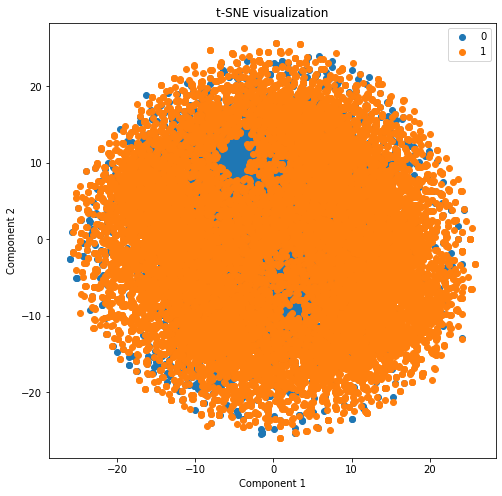

In [9]:

root_dir = '/home/ainazj1/psanjay_ada/users/ainazj1/Datasets/physionet.org/files/circor-heart-sound/1.0.3'
data_real = pd.read_csv(root_dir+'/real_diffwave_final.csv').drop('Unnamed: 0', axis=1).dropna()
data_real = data_real.sample(frac=0.5, random_state=12).reset_index(drop=True)
data_fake = pd.read_csv(root_dir+'/fake_diffwave_final.csv').drop('Unnamed: 0', axis=1).dropna() 
data_fake = data_fake.sample(frac=0.5, random_state=12).reset_index(drop=True)

data_real['label'] = 1
data_fake['label'] = 0

D = pd.concat([data_real, data_fake], axis =0)
D = D.sample(frac=1, random_state=12).reset_index(drop=True) # shuffle the data

print(D.shape)
labels = D['label']
data = D.drop('label', axis =1 )

# Create a t-SNE instance with desired parameters
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=42)

# Perform t-SNE on the data
tsne_results = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 8))
for label in np.unique(labels):
    # Find points with the current label
    indices = labels == label
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label)

# Annotate the plot
plt.legend()
plt.title('t-SNE visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
